# 7.01 Lesson 1 key concepts
## Reading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 15)


In [2]:
data = pd.read_csv('learningSet.csv')

C:\Users\VideoMachine\AppData\Local\Temp\ipykernel_13324\3673836359.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('learningSet.csv')


In [3]:
print(data.shape)
data.head()

(95412, 481)


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,...,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,...,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,...,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,...,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,...,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,...,2,F,X,X,X,26.0,A


In [4]:
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [5]:
data['TARGET_D'].describe()

count    95412.000000
mean         0.793073
std          4.429725
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        200.000000
Name: TARGET_D, dtype: float64

In [6]:
# Calculate the income of the donations by mail (0.68 cost of the mail piece)
95412 * (0.793-0.68)

10781.555999999999

In [7]:
data[data['TARGET_B']>0]['TARGET_D'].describe()

count    4843.000000
mean       15.624344
std        12.445137
min         1.000000
25%        10.000000
50%        13.000000
75%        20.000000
max       200.000000
Name: TARGET_D, dtype: float64

In [8]:
# Calculate the income of the donations by mail for target_D
4843 * (15.62 - 0.68)

72354.42

To solve this problem we will first build a classification model to predict who will more likely respond and then for those respondents, we will build a regression model to predict the donation amount.

Then we can use the cost matrix to calculate the total benefit from the donations

Some of the challenges with the dataset are as follows:

+ Large number of features: The data set has over 450 features. Hence selecting the right features for the model is very critical and at the same time it is not easy as the same traditional ways of removing features is not effective given the large number of features. Apart from feature selection, feature extraction (creating your own features using the existing features) is also not easy in this case.
+ Sparsity of the dataset: There are a lot of features with a large number of null values.
+ Data imbalance: For developing a classification, there is a huge imbalance in the training dataset with only approximately 5000 values for one category as compared to cover 95,000 instances for the other category.

# 7.01 Lesson 2 key concepts
## Review data cleaning process

There are a lot of columns that have a very high percentage of null values. It is a highly sparse dataset. 
We can decide on a threshold and then remove those variables. There is no rule of thumb to decide on this threshold value. 
Sometimes it can as low as 25%-30%. And sometimes in some data sets you might find that even though there are more than 50% missing values in a column, you might have to include that variable in your analysis. 
A lot of it depends on the business context as well. In this case we will take this threshold to be 25% and then check the definitions of the columns filtered, to see if there is any column that we might want to keep.

In [9]:
nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,OSOURCE,0.000000
2,TCODE,0.000000
3,STATE,0.000000
4,ZIP,0.000000
...,...,...
476,MDMAUD_R,0.000000
477,MDMAUD_F,0.000000
478,MDMAUD_A,0.000000
479,CLUSTER2,0.001383


In [10]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0]

,column_name,nulls_percentage
16,AGE,0.248030
23,NUMCHLD,0.870184
24,INCOME,0.223096
26,WEALTH1,0.468830
28,MBCRAFT,0.553955
...,...,...
455,RAMNT_24,0.814090
466,NEXTDATE,0.104526
467,TIMELAG,0.104526
479,CLUSTER2,0.001383


In [11]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>0.25]
columns_above_threshold['column_name']

23      NUMCHLD
26      WEALTH1
28      MBCRAFT
29     MBGARDEN
30      MBBOOKS
         ...   
451    RAMNT_20
452    RAMNT_21
453    RAMNT_22
454    RAMNT_23
455    RAMNT_24
Name: column_name, Length: 72, dtype: object

In [12]:
drop_columns_list = columns_above_threshold['column_name'].to_list()
print(drop_columns_list)

['NUMCHLD', 'WEALTH1', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN', 'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP', 'WEALTH2', 'ADATE_5', 'ADATE_10', 'ADATE_13', 'ADATE_15', 'ADATE_17', 'ADATE_19', 'ADATE_20', 'ADATE_21', 'ADATE_22', 'ADATE_23', 'ADATE_24', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8', 'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14', 'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_8', 'RAMNT_9', 'RAMNT_10', 'RAMNT_11', 'RAMNT_12', 'RAMNT_13', 'RAMNT_14', 'RAMNT_15', 'RAMNT_16', 'RAMNT_17', 'RAMNT_18', 'RAMNT_19', 'RAMNT_20', 'RAMNT_21', 'RAMNT_22', 'RAMNT_23', 'RAMNT_24']


From the list above that includes the columns that have over 25% null values, you discussed with your manager you were told that the following columns are important -> wealth1, wealth2
We will remove these variables from the above list 
RDATE3, RAMNT_3 are important but they have too many null values 

# 7.01 Activity 2
## Remove columns with null values greater than a specified threshold

In [13]:
for i in ['WEALTH1', 'WEALTH2']:
    drop_columns_list.remove(i)
print(drop_columns_list)

['NUMCHLD', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN', 'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP', 'ADATE_5', 'ADATE_10', 'ADATE_13', 'ADATE_15', 'ADATE_17', 'ADATE_19', 'ADATE_20', 'ADATE_21', 'ADATE_22', 'ADATE_23', 'ADATE_24', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8', 'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14', 'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_8', 'RAMNT_9', 'RAMNT_10', 'RAMNT_11', 'RAMNT_12', 'RAMNT_13', 'RAMNT_14', 'RAMNT_15', 'RAMNT_16', 'RAMNT_17', 'RAMNT_18', 'RAMNT_19', 'RAMNT_20', 'RAMNT_21', 'RAMNT_22', 'RAMNT_23', 'RAMNT_24']


In [14]:
data = data.drop(columns=drop_columns_list)
drop_columns_list = []

## More data cleaning

In [15]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,...,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,...,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,...,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,...,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,...,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,...,2,F,X,X,X,26.0,A


We can see that there are a lot of columns that have blank spaces which represent no value in this case. 
They were not identified as null values by python as they are empty spaces that are read as character values by 
python. We will replace those values by NaNs and repeat the analysis 

Before we do that we will replace the blank values from the column "MAILCODE" by "A" which would mean the address is okay (pl check the definition of the variable in the description)

In [16]:
data['MAILCODE'].value_counts()

     94013
B     1399
Name: MAILCODE, dtype: int64

In [17]:
data['MAILCODE'] = data['MAILCODE'].apply(lambda x: x.replace(" ", "A"))

In [18]:
data['MAILCODE'] = np.where(data['MAILCODE'] == " ", "A", data['MAILCODE'])

In [19]:
# Now we can replace the rest space characters with np.NaN

In [20]:
data = data.apply(lambda x: x.replace(" ", np.NaN))

In [21]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,...,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,A,NaN,...,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,A,NaN,...,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,A,NaN,...,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,A,NaN,...,4,E,X,X,X,41.0,C
4,8601,NaN,0,FL,33176,A,NaN,...,2,F,X,X,X,26.0,A


# 7.01 Activity 3
## Remove columns with null values greater than a specified threshold

In [22]:
nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']

In [23]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>0.25]
drop_columns_list = columns_above_threshold['column_name'].to_list()

We would again repeat the same exercise as the last time. We will discuss it with the team, manager, and/or other stakeholders to see which columns we need to retain here. 

Like last time we will keep the following -> wealth1, wealth2 along with these VETERANS, SOLIH

In [24]:
for i in ['WEALTH1', 'WEALTH2', 'VETERANS', 'SOLIH']:
    drop_columns_list.remove(i)
print(drop_columns_list)

['PVASTATE', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'AGEFLAG', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'SOLP3', 'MAJOR', 'GEOCODE', 'COLLECT1', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES', 'LIFESRC', 'PEPSTRFL', 'RFA_5', 'RFA_10', 'RFA_13', 'RFA_15', 'RFA_17', 'RFA_19', 'RFA_20', 'RFA_21', 'RFA_22', 'RFA_23', 'RFA_24']


In [25]:
data = data.drop(columns=drop_columns_list)
data

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,DOB,...,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,A,3712,...,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,A,5202,...,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,A,0,...,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,A,2801,...,4,E,X,X,X,41.0,C
4,8601,NaN,0,FL,33176,A,2001,...,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,ASE,1,AK,99504,A,0,...,1,G,X,X,X,12.0,C
95408,9601,DCD,1,TX,77379,A,5001,...,1,F,X,X,X,2.0,A
95409,9501,MBC,1,MI,48910,A,3801,...,3,E,X,X,X,34.0,B
95410,8601,PRV,0,CA,91320,A,4005,...,4,F,X,X,X,11.0,A


In [26]:
len(drop_columns_list)

43

# 7.01 Lesson 4 key concepts
## Separating Target, Numerical Features, and Categorical Features

Since we have a huge number of features, it would be easier to work independently on numerical features and categorical features.

For the target variables, for now we will retain them both together. But later, we will build a classification model first where we would need the column TARGET_B only.

In [27]:
Y = data[['TARGET_B', 'TARGET_D']]
Y.head()

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [28]:
numerical = data.select_dtypes(np.number)
numerical = numerical.drop(columns = ['TARGET_B', 'TARGET_D'])
numerical.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,...,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,0,...,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,...,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,NaN,3.0,1.0,2,...,9101.0,12.0,7.481481,15078,1,4,60.0
3,8701,0,2801,70.0,1.0,4.0,2,...,8711.0,9.0,6.812500,172556,1,4,41.0
4,8601,0,2001,78.0,3.0,2.0,60,...,8005.0,14.0,6.864865,7112,1,2,26.0


In [29]:
numerical.shape

(95412, 335)

In [30]:
categorical = data.select_dtypes(object)
categorical.head()

,OSOURCE,STATE,ZIP,MAILCODE,NOEXCH,MDMAUD,DOMAIN,...,RFA_18,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,A,0,XXXX,T2,...,S4E,L,E,X,X,X,C
1,BOA,CA,91326,A,0,XXXX,S1,...,NaN,L,G,X,X,X,A
2,AMH,NC,27017,A,0,XXXX,R2,...,S4D,L,E,X,X,X,C
3,BRY,CA,95953,A,0,XXXX,R2,...,S2D,L,E,X,X,X,C
4,NaN,FL,33176,A,0,XXXX,S2,...,A2D,L,F,X,X,X,A


In [31]:
categorical.shape

(95412, 31)

## Working with categorical columns

We will work with the categorical features first. Look at the columns one by one. Some of the operations which we will perform are:

- Replace null values with the most occurring categories
- Reduce the number of categories in a column by grouping

It is important to note that some columns are defined by python as categorical/object types. There might be other columns defined as numerical that we want as categorical. We will look them later when we were working on numerical types.

In [32]:
pd.set_option('display.max_rows', None)
categorical.isna().sum()/len(categorical)*100

OSOURCE      0.972624
STATE        0.000000
ZIP          0.000000
MAILCODE     0.000000
NOEXCH       0.007337
MDMAUD       0.000000
DOMAIN       2.427368
CLUSTER      2.427368
HOMEOWNR    23.296860
GENDER       3.099191
DATASRCE    22.303274
SOLIH       93.501866
VETERANS    89.072653
RFA_2        0.000000
RFA_3        2.043768
RFA_4        2.423175
RFA_6        3.728043
RFA_7        9.300717
RFA_8        3.679831
RFA_9       11.785729
RFA_11      10.923154
RFA_12       9.352073
RFA_14      19.774242
RFA_16      21.398776
RFA_18      22.285457
RFA_2R       0.000000
RFA_2A       0.000000
MDMAUD_R     0.000000
MDMAUD_F     0.000000
MDMAUD_A     0.000000
GEOCODE2     0.334339
dtype: float64

In [33]:
pd.set_option('display.max_rows', 15)

## Categorical Variables

Here we will try to reduce the number of categories. An ideal way would have been to group the states into 
regions. But in this case we will group all the states with counts less than 2500 into one category "other"

In [34]:
df = pd.DataFrame(categorical['STATE'].value_counts()).reset_index()

df.columns = ['state', 'count']
other_states = df[df['count']<2500]['state'].to_list()

def clean_state(x):
    if x in other_states:
        return 'other'
    else:
        return x
    
categorical['STATE'] = categorical['STATE'].apply(clean_state)

In [35]:
# Try something like this
# categorical['STATE'] = np.where(categorical['STATE'] in other_states, 'other', categorical['STATE'])

In [36]:
categorical['STATE'].value_counts()

other    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: STATE, dtype: int64

# 7.01 Lab | Revisiting Machine Learning Case Study

Check for null values in all the columns

In [37]:
categorical.isna().sum()/len(categorical)*100

OSOURCE     0.972624
STATE       0.000000
ZIP         0.000000
MAILCODE    0.000000
NOEXCH      0.007337
              ...   
RFA_2A      0.000000
MDMAUD_R    0.000000
MDMAUD_F    0.000000
MDMAUD_A    0.000000
GEOCODE2    0.334339
Length: 31, dtype: float64

- Exclude the following variables by looking at the definitions. Create a new empty list called `drop_list`. We will append this list and then drop all the columns in this list later:
    - `OSOURCE` - symbol definitions not provided, too many categories
    - `ZIP CODE` - we are including state already

In [38]:
categorical = categorical.drop(columns= ['OSOURCE','ZIP'])

- Reduce the number of categories in the column `GENDER`. The column should only have either "M" for males, "F" for females, and "other" for all the rest

In [39]:
print(categorical['GENDER'].value_counts())

F    51277
M    39094
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64


In [40]:
categorical['GENDER'] = categorical['GENDER'].where((categorical['GENDER'] == 'M') | (categorical['GENDER'] == 'F'), 'OTHER')

In [41]:
categorical['GENDER'].value_counts()

F        54234
M        39094
OTHER     2084
Name: GENDER, dtype: int64

# 7.02

We will work on the column DOMAIN. Let's replace the null values with the category that is represented the most and then we will split the data into two columns DOMAIN_A and DOMAIN_B.

- DOMAIN_A will consist of the first character from the DOMAIN
- DOMAIN_B will consist of the second character from the DOMAIN

Then we will drop the original column DOMAIN

In [42]:
categorical['DOMAIN'].value_counts(dropna=False)

R2     13623
T2     12369
S1     11503
S2      8530
C2      8264
       ...  
NaN     2316
T3      2176
S3      1891
U4      1804
R1      1358
Name: DOMAIN, Length: 17, dtype: int64

In [43]:
categorical['DOMAIN'] = categorical['DOMAIN'].fillna('R2')

In [44]:
categorical['DOMAIN_A'] = categorical['DOMAIN'].str[:1]
categorical['DOMAIN_B'] = categorical['DOMAIN'].str[1:2]

In [45]:
categorical = categorical.drop(columns=['DOMAIN'])

In [46]:
categorical.head()

,STATE,MAILCODE,NOEXCH,MDMAUD,CLUSTER,HOMEOWNR,GENDER,...,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,A,0,XXXX,36,NaN,F,...,E,X,X,X,C,T,2
1,CA,A,0,XXXX,14,H,M,...,G,X,X,X,A,S,1
2,NC,A,0,XXXX,43,U,M,...,E,X,X,X,C,R,2
3,CA,A,0,XXXX,44,U,F,...,E,X,X,X,C,R,2
4,FL,A,0,XXXX,16,H,F,...,F,X,X,X,A,S,2


### Activity 2.1

In [49]:
list_t = ['MAILCODE', 'NOEXCH', 'MDMAUD']
for i in list_t:
    print(i)
    print(categorical[i].value_counts(dropna=False))

MAILCODE
A    94013
B     1399
Name: MAILCODE, dtype: int64
NOEXCH
0      61203
0      33882
1        195
1         90
X         35
NaN        7
Name: NOEXCH, dtype: int64
MDMAUD
XXXX    95118
C1CM       65
L1CM       44
I1CM       37
D2CM       28
        ...  
I2MM        1
L1MM        1
L2LM        1
C5TM        1
L2TM        1
Name: MDMAUD, Length: 28, dtype: int64


In [ ]:
# drop_list = drop_list.tolist()

In [51]:
drop_list = []
drop_list += list_t

In [52]:
drop_list

['MAILCODE', 'NOEXCH', 'MDMAUD']

MDMAUD_XXX are also like MDMAUD



In [53]:
drop_list = drop_list + ['MDMAUD_R', 'MDMAUD_F','MDMAUD_A']

Replacing NULL values

In [54]:
categorical['CLUSTER'].value_counts(dropna=False)

40    3979
35    3624
36    3617
27    3553
24    3539
      ... 
6      603
33     593
4      561
19     497
52     270
Name: CLUSTER, Length: 54, dtype: int64

In [55]:
categorical['CLUSTER'] = categorical['CLUSTER'].fillna('40')

In [56]:
categorical['HOMEOWNR'].value_counts(dropna=False)

H      52354
NaN    22228
U      20830
Name: HOMEOWNR, dtype: int64

In [57]:
categorical['HOMEOWNR'] = categorical['HOMEOWNR'].fillna('U')

In [58]:
categorical['GENDER'].value_counts(dropna=False)

F        54234
M        39094
OTHER     2084
Name: GENDER, dtype: int64

In [59]:
#discuss why this makes more sense than the alternatives
categorical['GENDER'] = categorical['GENDER'].fillna('F')

### Activity 2.2.1

In [60]:
list_t = ['DATASRCE', 'GEOCODE2']
for i in list_t:
    print(i)
    print(categorical[i].value_counts(dropna=False))

DATASRCE
3      43549
2      23455
NaN    21280
1       7128
Name: DATASRCE, dtype: int64
GEOCODE2
A      34484
B      28505
D      16580
C      15524
NaN      319
Name: GEOCODE2, dtype: int64


In [61]:
# Following Jan solution but later will try 4 as other class
categorical['DATASRCE'] = categorical['DATASRCE'].fillna('3')
# Most frequent data gets the nan
categorical['GEOCODE2'] = categorical['GEOCODE2'].fillna('A')

Removing columns with similar information

In [62]:
categorical['RFA_2'].value_counts()

L1F    30380
L1G    12384
L2F    10961
L3E     7767
L2E     4989
L4D     4914
L1E     4911
L2G     4595
L4E     3972
L3F     3523
L3D     2498
L4F     2100
L3G     1503
L4G      915
Name: RFA_2, dtype: int64

In [63]:
# We will keep the column RFA_2X. We will delete rest of the columns 
for col_name in categorical.columns:
    if "RFA" in col_name:
        drop_list.append(col_name)       

In [64]:
drop_list.remove('RFA_2R')
drop_list.remove('RFA_2A')
drop_list

['MAILCODE',
 'NOEXCH',
 'MDMAUD',
 'MDMAUD_R',
 'MDMAUD_F',
 'MDMAUD_A',
 'RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_11',
 'RFA_12',
 'RFA_14',
 'RFA_16',
 'RFA_18']

In [65]:
categorical = categorical.drop(columns=drop_list)
categorical.head()

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,SOLIH,VETERANS,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,36,U,F,3,NaN,NaN,L,E,C,T,2
1,CA,14,H,M,3,NaN,NaN,L,G,A,S,1
2,NC,43,U,M,3,NaN,NaN,L,E,C,R,2
3,CA,44,U,F,3,NaN,NaN,L,E,C,R,2
4,FL,16,H,F,3,12,NaN,L,F,A,S,2


In [66]:
categorical.isna().sum()

STATE           0
CLUSTER         0
HOMEOWNR        0
GENDER          0
DATASRCE        0
SOLIH       89212
VETERANS    84986
RFA_2R          0
RFA_2A          0
GEOCODE2        0
DOMAIN_A        0
DOMAIN_B        0
dtype: int64

# Working with numerical columns 

In [67]:
numerical.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,...,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,0,...,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,...,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,NaN,3.0,1.0,2,...,9101.0,12.0,7.481481,15078,1,4,60.0
3,8701,0,2801,70.0,1.0,4.0,2,...,8711.0,9.0,6.812500,172556,1,4,41.0
4,8601,0,2001,78.0,3.0,2.0,60,...,8005.0,14.0,6.864865,7112,1,2,26.0


In [ ]:
numerical.shape

(95412, 335)

In [68]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
3,AGE,23665
4,INCOME,21286
5,WEALTH1,44732
14,WEALTH2,43823
135,MSA,132
...,...,...
311,ADATE_16,20364
312,ADATE_18,21263
328,NEXTDATE,9973
329,TIMELAG,9973


In [79]:
drop_list = []
for i in numerical.columns:
    if 'ADATE' in i:
        drop_list.append(i)

In [81]:
drop_list.pop()
drop_list

['ADATE_2',
 'ADATE_3',
 'ADATE_4',
 'ADATE_6',
 'ADATE_7',
 'ADATE_8',
 'ADATE_9',
 'ADATE_11',
 'ADATE_12',
 'ADATE_14',
 'ADATE_16',
 'ADATE_18']

### Activity 2.2.2

### Filling NULL values with plots

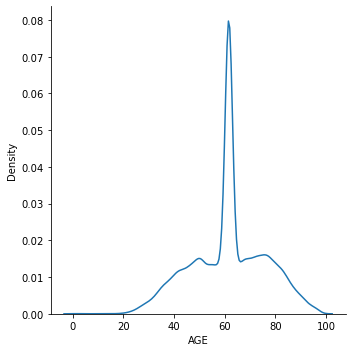

In [86]:
numerical['AGE'] = numerical["AGE"].fillna(np.mean(numerical['AGE']))
sns.displot(numerical['AGE'], kind = 'kde')
plt.show()
#probably would be a bit better to use a predictive method here but this works

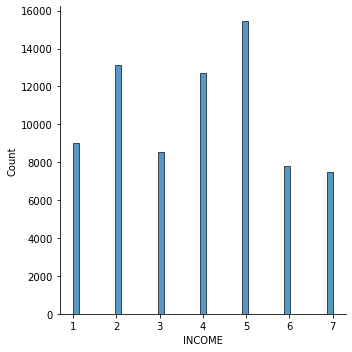

In [92]:
# categorical column
sns.displot(numerical['INCOME'])
plt.show()

In [93]:
# looks like the variable is actually categorical. We can verify it by using value_counts()
print(numerical['INCOME'].value_counts())
numerical['INCOME'] = numerical['INCOME'].astype('object')

5.0    15451
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: INCOME, dtype: int64


In [107]:
# Replacing the null values with the most represented category
numerical['INCOME'] = numerical['INCOME'].fillna(5.0)

In [108]:
numerical['INCOME'].value_counts()

5.0    36737
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: INCOME, dtype: int64

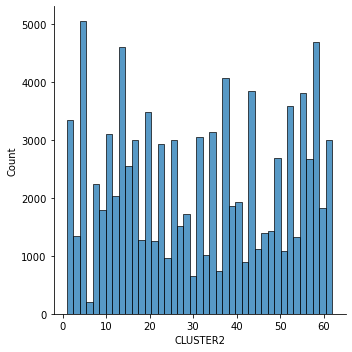

In [110]:
sns.displot(numerical['CLUSTER2']) 
plt.show()

In [111]:
numerical['CLUSTER2'] = numerical['CLUSTER2'].fillna(np.ceil(np.mean(numerical['CLUSTER2'])))

###Activity 2.3

In [121]:
numerical_nuls = numerical.isna().sum().reset_index()
numerical_nuls.columns = ['column', 'count']

In [127]:
numerical_nuls[numerical_nuls['count'] > 0]

,column,count
5,WEALTH1,44732
14,WEALTH2,43823
135,MSA,132
136,ADI,132
137,DMA,132
...,...,...
310,ADATE_14,18867
311,ADATE_16,20364
312,ADATE_18,21263
328,NEXTDATE,9973


In [130]:
numerical['WEALTH2'].value_counts(dropna = False)

NaN    43823
9.0     6523
8.0     5975
7.0     5684
6.0     5497
5.0     5351
4.0     5074
3.0     5046
2.0     4971
1.0     4191
0.0     3277
Name: WEALTH2, dtype: int64

In [135]:
numerical['WEALTH2'] = numerical['WEALTH2'].fillna(np.ceil(numerical['WEALTH2'].mean()))
numerical['WEALTH2'].value_counts()

5.0    49174
9.0     6523
8.0     5975
7.0     5684
6.0     5497
4.0     5074
3.0     5046
2.0     4971
1.0     4191
0.0     3277
Name: WEALTH2, dtype: int64

In [139]:
numerical['TIMELAG'].value_counts(dropna = False)

6.0       16621
5.0        8584
4.0        8490
3.0        8485
2.0        6275
          ...  
89.0          1
77.0          1
61.0          1
58.0          1
1088.0        1
Name: TIMELAG, Length: 68, dtype: int64

In [138]:
numerical['TIMELAG'] = numerical['TIMELAG'].fillna(numerical['TIMELAG'].median())

# Lab 2

    Check for null values in the numerical columns.
    Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.
    Use appropriate EDA technique where ever necessary.


    Check for null values in the numerical columns.

In [146]:
# Showing all columns that still have nans
numerical_nuls = numerical.isna().sum().reset_index()
numerical_nuls.columns = ['column', 'count']
numerical_nuls = numerical_nuls[numerical_nuls['count'] > 0]

# Show the columns that have nan's and that are not in the drop list
numerical_nuls = numerical_nuls.loc[~numerical_nuls['column'].isin(drop_list)]
numerical_nuls

,column,count
5,WEALTH1,44732
135,MSA,132
136,ADI,132
137,DMA,132
328,NEXTDATE,9973


    Use appropriate methods to clean the columns WEALTH1, ADI, DMA,and MSA.

In [157]:
for i in numerical_nuls['column']:
    if i != 'NEXTDATE':
        print(i)
        display(numerical[i].value_counts(dropna=False))
        display(numerical[i].isna().sum())

WEALTH1


NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

44732

MSA


0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 299, dtype: int64

132

ADI


13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 205, dtype: int64

132

DMA


803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 207, dtype: int64

132

In [ ]:
WEALTH1 Wealth Rating
MSA                         MSA Code
ADI                         ADI Code
DMA                         DMA Code

In [160]:
numerical[numerical_nuls['column']].describe().T

,count,mean,std,min,25%,50%,75%,max
WEALTH1,50680.0,5.345699,2.742490,0.0,3.0,6.0,8.0,9.0
MSA,95280.0,3527.744102,2863.904737,0.0,520.0,3350.0,5960.0,9360.0
ADI,95280.0,187.356402,137.019184,0.0,65.0,175.0,279.0,651.0
DMA,95280.0,664.004072,116.363600,0.0,561.0,635.0,801.0,881.0
NEXTDATE,85439.0,9151.022917,294.257260,7211.0,8903.0,9204.0,9409.0,9702.0


    For MSA, ADI, DMA since the percentage relative to the dataset is minimal and they are codes, I'm assingning the nan's to the most frequent number.

In [161]:
numerical['MSA'] = numerical['MSA'].fillna(0.0)
numerical['ADI'] = numerical['ADI'].fillna(13.0)
numerical['DMA'] = numerical['DMA'].fillna(803.0)

    Regarding WEALTH1 I'm going to follow the same thought process as WEALTH2

In [162]:
numerical['WEALTH1'] = numerical['WEALTH1'].fillna(np.ceil(numerical['WEALTH1'].mean()))

#Wrapping up

In [163]:
numerical = numerical.drop(columns=drop_list)

In [164]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
316,NEXTDATE,9973


In [165]:
numerical.to_csv('numerical7_02.csv')
categorical.to_csv('categorical7_02.csv')

In [166]:
Y.to_csv('target7_02.csv')

In [ ]:
# numerical.to_pickle('numerical7_02.p')
# categorical.to_pickle('categorical7_02.p')
# Y.to_pickle('target7.02.p')